In [1]:
"""Auction mutation analysis"""

from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from core.core import decode_filename, save_plot, analysis_filename, ImageFormat

In [4]:
basic = [
    "mutate_iterative_auction_basic_j12_s2_0",
    "mutate_iterative_auction_basic_j15_s2_0",
    "mutate_iterative_auction_basic_j15_s3_0",
    "mutate_iterative_auction_basic_j25_s5_0"
]

paper = [
    "mutate_iterative_auction_fog_j15_s3_0",
    "mutate_iterative_auction_fog_j15_s3_1",
    "mutate_iterative_auction_fog_j25_s5_0",
    "mutate_iterative_auction_fog_j15_s3_1",
]

encoded_filenames = paper
folder = 'paper'
y_axis = 'Mutate Difference' 
title = 'Effect of job misrepresentation on prices'

In [8]:
data = []
model_names = []

for encoded_filename in encoded_filenames:
    filename, model_name, test_name = decode_filename(folder, encoded_filename)
    model_names.append(model_name)
    
    with open(filename) as file:
        file_data = json.load(file)

        for pos, result in enumerate(file_data):
            for mutation_name, mutation_results in result.items():
                if mutation_name == "no mutation":
                    data.append((pos, model_name, "No Mutation", mutation_results['total money'], 0, 0, 0, mutation_results['total_iterations']))
                else:
                    data.append((pos, model_name, "Mutation", mutation_results['total money'], mutation_results['sum value'],
                                 mutation_results['mutant_value'], mutation_results['mutated_value'],                                     
                                 mutation_results['mutant_value'] - mutation_results['mutated_value'],
                                 mutation_results['total_iterations'], mutation_results['difference']))
data = reversed(data)

df = pd.DataFrame(data, columns=['Pos', 'Model', 'Mutation', 'Total Money', 'Social Welfare', 'Mutant Value', 'Mutated Value',
                                 'Mutate Difference', 'Iterations', 'Difference'])
df

,Pos,Model,Mutation,Total Money,Social Welfare,Mutant Value,Mutated Value,Mutate Difference,Iterations,Difference
0,25,Tasks: 15 Servers: 3,Mutation,552,613,0,32,-32,215.0,"job 6 - mutated job 6: 3, 11, 7, -14, 32"
1,25,Tasks: 15 Servers: 3,Mutation,524,587,0,34,-34,206.0,"job 0 - mutated job 0: 2, 0, 0, -54, 65"
2,25,Tasks: 15 Servers: 3,Mutation,562,613,2,22,-20,215.0,"job 8 - mutated job 8: 19, 1, 6, -10, 20"
3,25,Tasks: 15 Servers: 3,Mutation,466,636,2,36,-34,192.0,"job 14 - mutated job 14: 13, 1, 6, -44, 53"
4,25,Tasks: 15 Servers: 3,Mutation,462,640,4,28,-24,189.0,"job 12 - mutated job 12: 10, 3, 1, -43, 49"
...,...,...,...,...,...,...,...,...,...,...
597,0,Tasks: 15 Servers: 3,Mutation,564,730,4,40,-36,227.0,"job 5 - mutated job 5: 12, 1, 1, -41, 53"
598,0,Tasks: 15 Servers: 3,Mutation,570,732,2,40,-38,232.0,"job 1 - mutated job 1: 6, 12, 3, -44, 48"
599,0,Tasks: 15 Servers: 3,Mutation,488,738,6,40,-34,209.0,"job 9 - mutated job 9: 12, 19, 2, -78, 84"
600,0,Tasks: 15 Servers: 3,Mutation,534,767,6,42,-36,230.0,"job 14 - mutated job 14: 1, 9, 4, -52, 55"


In [ ]:
df[df['Mutate Difference'] > 0]

Save file location: ../figures/auction_mutation/png/mutate_auction.png


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Save file location: ../figures/auction_mutation/eps/mutate_auction.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


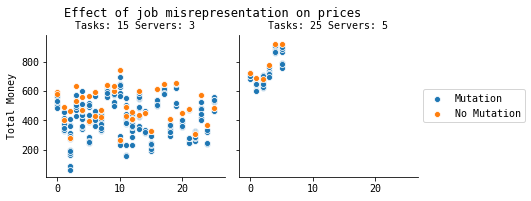

In [9]:
g = sns.FacetGrid(df, col='Model', col_wrap=2, hue='Mutation')
g = (g.map(sns.scatterplot, 'Pos', "Total Money")
     .set_titles("{col_name}").set_xlabels(""))
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle(title)

save_plot(analysis_filename('mutate', 'auction'), "auction_mutation", image_formats=[ImageFormat.PNG, ImageFormat.EPS])

g

Save file location: ../figures/auction_mutation/png/mutate_auction.png


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Save file location: ../figures/auction_mutation/eps/mutate_auction.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


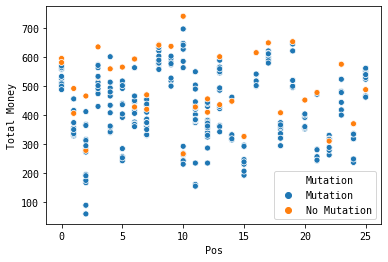

In [11]:
df_2 = df[df['Model'] == 'Tasks: 15 Servers: 3']
g = sns.scatterplot('Pos', 'Total Money', hue='Mutation', data=df_2)
save_plot(analysis_filename('mutate', 'auction'), "auction_mutation", image_formats=[ImageFormat.PNG, ImageFormat.EPS])


In [ ]:
data = []
i = 0
for index, (pos, model, mutation, total_money, mutant_value, mutated_value, mutate_difference, iterations, difference) in df.iterrows():
    if mutation == "Mutation" and model == 'Tasks: 15 Servers: 3':
        data.append((i, model, mutant_value, "Mutant"))
        data.append((i, model, mutated_value, "Mutated"))
        i += 1
        
df_2 = pd.DataFrame(data, columns=["Pos", "Model", "Value", "Type"])
df_3 = df_2[df_2['Model'] == "Tasks: 15 Servers: 3"]

g = sns.scatterplot('Pos', 'Value', hue='Type', data=df_3)

save_plot(analysis_filename('mutate', 'auction'), "auction_mutation", image_formats=[ImageFormat.PNG, ImageFormat.EPS])

g   